# 1. Load Libraries
---

In [5]:
"""!pip install scikit-learn==1.4.2 imbalanced-learn==0.11.0
!pip install pandas numpy matplotlib seaborn scikit-learn nltk
!pip install joblib
!pip install scipy
!pip install pycaret
!pip install imbalanced-learn
"""

'!pip install scikit-learn==1.4.2 imbalanced-learn==0.11.0\n!pip install pandas numpy matplotlib seaborn scikit-learn nltk\n!pip install joblib\n!pip install scipy\n!pip install pycaret\n!pip install imbalanced-learn\n'

In [19]:
# Libraries for data manipulation and visualization
import pandas as pd
import numpy as np
import re
import string
import pickle

import matplotlib.pyplot as plt
import seaborn as sns

# Libraries for machine learning
from nltk.corpus import stopwords
from nltk import download
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC

In [7]:
download('stopwords')
stop_words = set(stopwords.words('indonesian'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Razy31\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# 2. Load Data
---

In [8]:
df = pd.read_csv('all_comments_for_labeling_cleaned.csv', delimiter=';', encoding='utf-8')
df.head()

,comments,source,label
0,fokus piala presiden kekny,tiktok,negative
1,emyu cocoknya main di liga aja dah,tiktok,negative
2,sudah bisa di pastikan degradasi gk sih di mus...,tiktok,negative
3,ya puasa gelar,tiktok,negative
4,happy banget cuma di keberuntungan datang terus,youtube,positive


In [9]:
new_df = df[['comments', 'label']].copy()
new_df.head()

,comments,label
0,fokus piala presiden kekny,negative
1,emyu cocoknya main di liga aja dah,negative
2,sudah bisa di pastikan degradasi gk sih di mus...,negative
3,ya puasa gelar,negative
4,happy banget cuma di keberuntungan datang terus,positive


In [10]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   comments  1867 non-null   object
 1   label     1867 non-null   object
dtypes: object(2)
memory usage: 29.3+ KB


In [11]:
new_df.describe(include='all')

,comments,label
count,1867,1867
unique,1784,3
top,sebelum ribuan,negative
freq,15,1243


In [12]:
new_df['label'].value_counts()

label
negative    1243
neutral      446
positive     178
Name: count, dtype: int64

# 3. Text Cleaning
---

In [13]:
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r"http\S+|www.\S+", "", text)  # Remove URLs
    text = re.sub(r"@\w+|#\w+", "", text)        # Remove mentions and hashtags
    text = re.sub(r"\d+", "", text)              # Remove numbers
    text = re.sub(rf"[{string.punctuation}]", " ", text)  # Remove punctuation
    text = re.sub(r"\s+", " ", text).strip()     # Remove extra spaces
    return text

new_df['cleaned_comments'] = new_df['comments'].apply(clean_text)
new_df.head()

,comments,label,cleaned_comments
0,fokus piala presiden kekny,negative,fokus piala presiden kekny
1,emyu cocoknya main di liga aja dah,negative,emyu cocoknya main di liga aja dah
2,sudah bisa di pastikan degradasi gk sih di mus...,negative,sudah bisa di pastikan degradasi gk sih di mus...
3,ya puasa gelar,negative,ya puasa gelar
4,happy banget cuma di keberuntungan datang terus,positive,happy banget cuma di keberuntungan datang terus


# 4. Stopword Removal
---

In [14]:
def remove_stopwords(text):
    tokens = text.split()
    filtered = [word for word in tokens if word not in stop_words]
    return " ".join(filtered)

new_df['cleaned_comments'] = new_df['cleaned_comments'].apply(remove_stopwords)
new_df.head()

,comments,label,cleaned_comments
0,fokus piala presiden kekny,negative,fokus piala presiden kekny
1,emyu cocoknya main di liga aja dah,negative,emyu cocoknya main liga aja dah
2,sudah bisa di pastikan degradasi gk sih di mus...,negative,pastikan degradasi gk sih musim
3,ya puasa gelar,negative,ya puasa gelar
4,happy banget cuma di keberuntungan datang terus,positive,happy banget keberuntungan


# 5. Feature Engineering (TF-IDF)
---

In [16]:
vectorizer = TfidfVectorizer(ngram_range=(1, 2), max_features=5000)
X = vectorizer.fit_transform(new_df['cleaned_comments'])
y = new_df['label']

# 6. Train-Test Split
---

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# 7. Research Model & Model Evaluate
---

In [20]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Multinomial NB": MultinomialNB(),
    "Linear SVM": LinearSVC()
}


Model: Logistic Regression
              precision    recall  f1-score   support

    negative       0.71      0.98      0.83       249
     neutral       0.79      0.26      0.39        89
    positive       1.00      0.06      0.11        36

    accuracy                           0.72       374
   macro avg       0.84      0.43      0.44       374
weighted avg       0.76      0.72      0.65       374



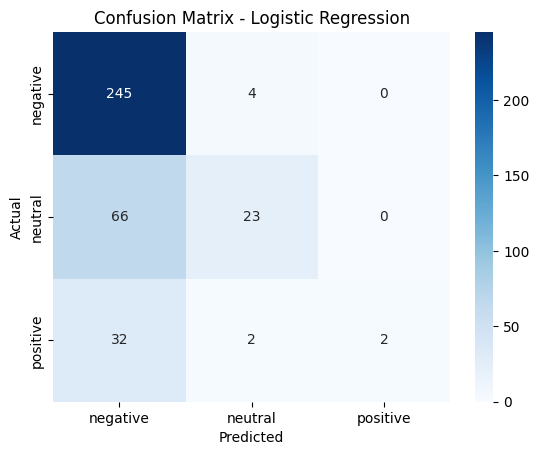


Model: Multinomial NB
              precision    recall  f1-score   support

    negative       0.69      0.99      0.82       249
     neutral       0.80      0.18      0.29        89
    positive       0.00      0.00      0.00        36

    accuracy                           0.70       374
   macro avg       0.50      0.39      0.37       374
weighted avg       0.65      0.70      0.61       374



c:\Users\Razy31\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Razy31\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Razy31\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

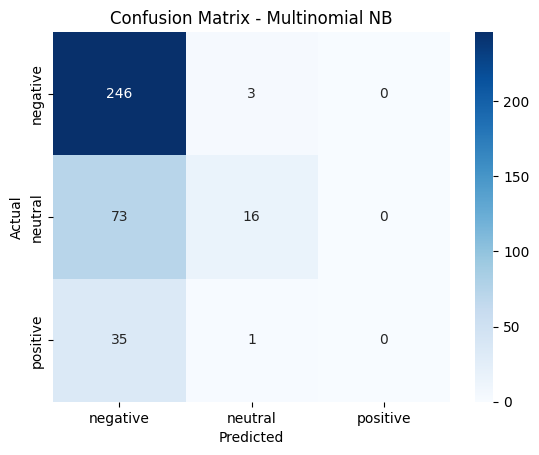


Model: Linear SVM
              precision    recall  f1-score   support

    negative       0.77      0.93      0.84       249
     neutral       0.65      0.40      0.50        89
    positive       0.58      0.31      0.40        36

    accuracy                           0.74       374
   macro avg       0.67      0.55      0.58       374
weighted avg       0.72      0.74      0.72       374



c:\Users\Razy31\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


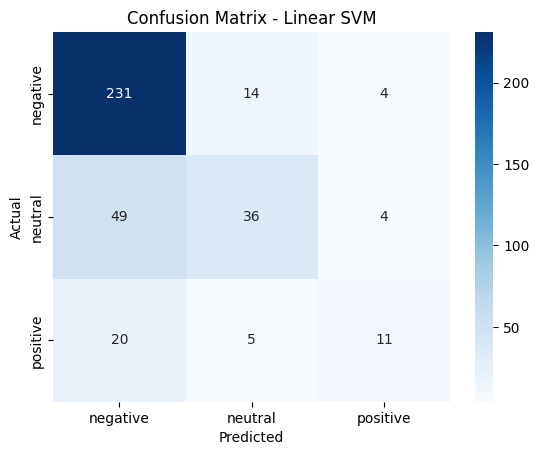

In [23]:
for name, model in models.items():
    print(f"\nModel: {name}")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred, labels=model.classes_)

    sns.heatmap(cm, annot=True, fmt="d", xticklabels=model.classes_, yticklabels=model.classes_, cmap="Blues")
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

Hasil pelatihan menunjukkan performa yang kurang baik karena adanya ketidak setaraan antara pembagian label dimana label negative terlampau terlalu tinggi dibandingkan label postif ataupun negatif sehingga harus ada penyesuaian. Sekarang kita coba terlebih dahulu menggunakan Resampling dengan bantuan libraries imblearn.over_sampling

In [24]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)
X_res, y_res = ros.fit_resample(X_train, y_train)

Model: Logistic Regression
              precision    recall  f1-score   support

    negative       0.86      0.84      0.85       249
     neutral       0.62      0.69      0.65        89
    positive       0.38      0.36      0.37        36

    accuracy                           0.76       374
   macro avg       0.62      0.63      0.63       374
weighted avg       0.76      0.76      0.76       374



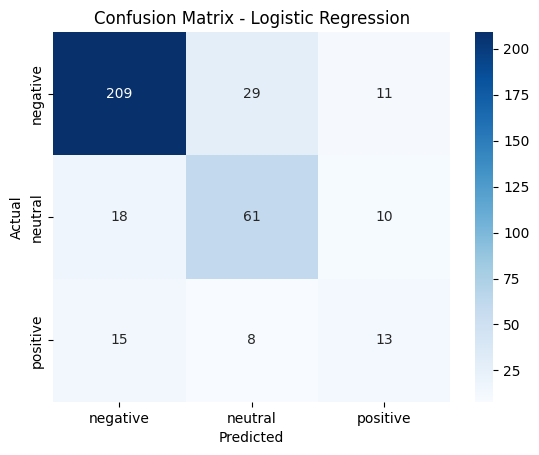

Model: Multinomial NB
              precision    recall  f1-score   support

    negative       0.83      0.71      0.76       249
     neutral       0.54      0.51      0.52        89
    positive       0.24      0.53      0.33        36

    accuracy                           0.64       374
   macro avg       0.54      0.58      0.54       374
weighted avg       0.70      0.64      0.66       374



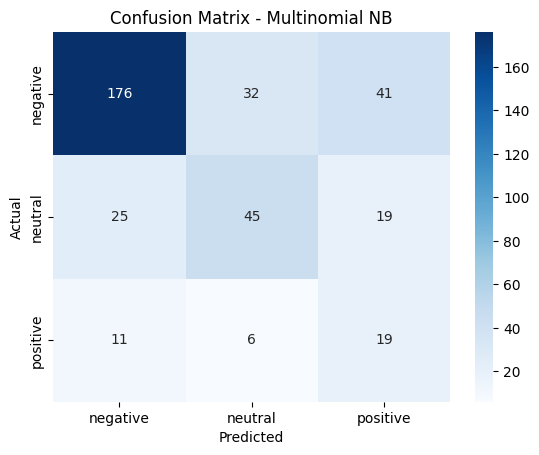

Model: Linear SVM
              precision    recall  f1-score   support

    negative       0.86      0.84      0.85       249
     neutral       0.60      0.66      0.63        89
    positive       0.42      0.36      0.39        36

    accuracy                           0.75       374
   macro avg       0.63      0.62      0.62       374
weighted avg       0.75      0.75      0.75       374



c:\Users\Razy31\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


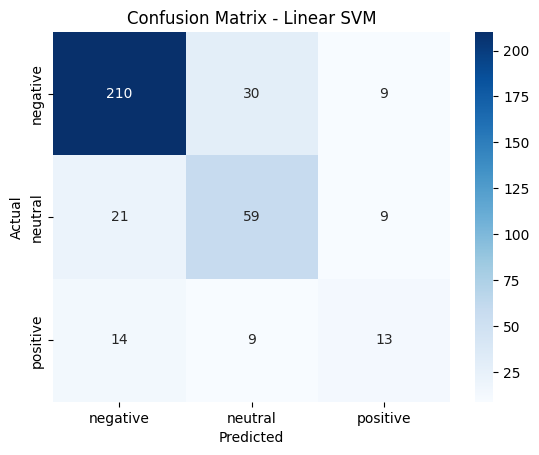

In [25]:
balanced_models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Multinomial NB": MultinomialNB(),
    "Linear SVM": LinearSVC()
}

# Latih dan evaluasi masing-masing model
for name, model in balanced_models.items():
    print("="*50)
    print(f"Model: {name}")

    # Latih dengan data hasil oversampling
    model.fit(X_res, y_res)

    # Prediksi pada test set asli (bukan hasil oversampling)
    y_pred = model.predict(X_test)

    # Laporan klasifikasi
    print(classification_report(y_test, y_pred))

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=model.classes_,
                yticklabels=model.classes_)
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()


Model: Logistic Regression (class_weight)
              precision    recall  f1-score   support

    negative       0.87      0.80      0.83       249
     neutral       0.58      0.70      0.63        89
    positive       0.33      0.36      0.35        36

    accuracy                           0.73       374
   macro avg       0.60      0.62      0.60       374
weighted avg       0.75      0.73      0.74       374



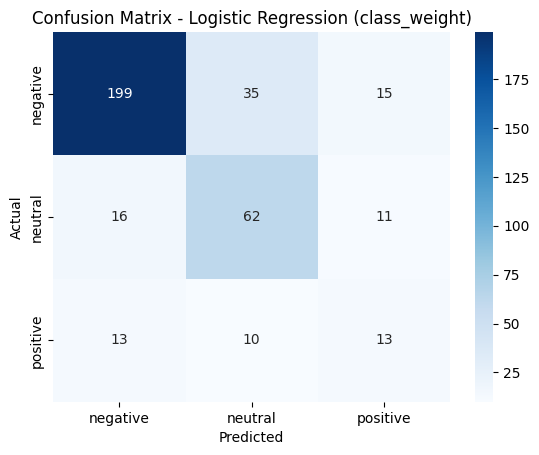

Model: Linear SVM (class_weight)
              precision    recall  f1-score   support

    negative       0.85      0.89      0.87       249
     neutral       0.64      0.64      0.64        89
    positive       0.46      0.33      0.39        36

    accuracy                           0.78       374
   macro avg       0.65      0.62      0.63       374
weighted avg       0.76      0.78      0.77       374



c:\Users\Razy31\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


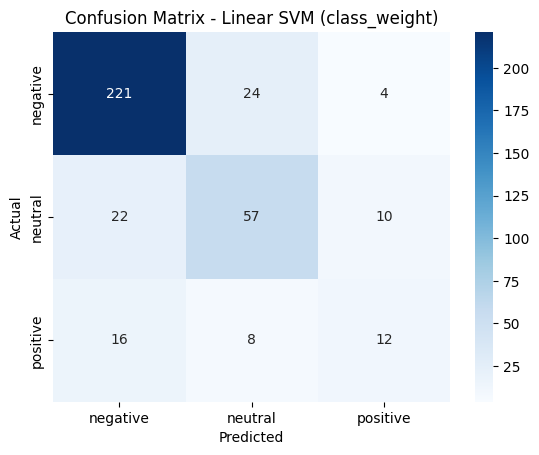

In [26]:
# Daftar model dengan class_weight
weighted_models = {
    "Logistic Regression (class_weight)": LogisticRegression(class_weight='balanced', max_iter=1000),
    "Linear SVM (class_weight)": LinearSVC(class_weight='balanced')
}

# Daftar model dengan class_weight
weighted_models = {
    "Logistic Regression (class_weight)": LogisticRegression(class_weight='balanced', max_iter=1000),
    "Linear SVM (class_weight)": LinearSVC(class_weight='balanced')
}

for name, model in weighted_models.items():
    print("="*60)
    print(f"Model: {name}")

    # Latih model dengan data imbalanced (asli)
    model.fit(X_train, y_train)

    # Prediksi di test set
    y_pred = model.predict(X_test)

    # Evaluasi
    print(classification_report(y_test, y_pred))

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=model.classes_,
                yticklabels=model.classes_)
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

In [28]:
from pycaret.classification import ClassificationExperiment
from imblearn.over_sampling import SMOTE

s = ClassificationExperiment()

s.setup(
    data = new_df,
    target = 'label', 
    train_size = 0.7,
    session_id = 123,
    preprocess = True,
    text_features = ['cleaned_comments'],
    ignore_features = ['comments'],
    fix_imbalance = True,
    fix_imbalance_method = SMOTE(),
    verbose = False
)

In [29]:
train_model = s.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.7228,0.8126,0.7228,0.7303,0.7197,0.4369,0.4413,1.1150
rf,Random Forest Classifier,0.7075,0.8007,0.7075,0.7166,0.7036,0.4061,0.4111,0.7870
svm,SVM - Linear Kernel,0.7067,0.0000,0.7067,0.7285,0.7124,0.4338,0.4394,0.3300
ridge,Ridge Classifier,0.7067,0.0000,0.7067,0.7414,0.7163,0.4488,0.4571,0.4100
lr,Logistic Regression,0.7037,0.0000,0.7037,0.7414,0.7126,0.4476,0.4582,1.1710
xgboost,Extreme Gradient Boosting,0.6922,0.7976,0.6922,0.7109,0.6929,0.3986,0.4058,1.2310
catboost,CatBoost Classifier,0.6808,0.8024,0.6808,0.7152,0.6851,0.3980,0.4101,13.8420
dummy,Dummy Classifier,0.6654,0.5000,0.6654,0.4428,0.5317,0.0000,0.0000,0.1550
dt,Decision Tree Classifier,0.6624,0.6832,0.6624,0.6775,0.6663,0.3436,0.3467,0.2880
lightgbm,Light Gradient Boosting Machine,0.6624,0.7643,0.6624,0.6859,0.6660,0.3470,0.3535,0.8820


In [30]:
print(train_model)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     monotonic_cst=None, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=123, verbose=0,
                     warm_start=False)


# 8. Model Training (Logistic Regression with class_weight)
---

In [31]:
# Final model training (class-weighted Logistic Regression)
from sklearn.linear_model import LogisticRegression

final_model = LogisticRegression(max_iter=1000, class_weight='balanced')
final_model.fit(X_train, y_train)


LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

# 9. Evaluate Final Model
---

Classification Report:
              precision    recall  f1-score   support

    negative       0.85      0.89      0.87       249
     neutral       0.64      0.64      0.64        89
    positive       0.46      0.33      0.39        36

    accuracy                           0.78       374
   macro avg       0.65      0.62      0.63       374
weighted avg       0.76      0.78      0.77       374



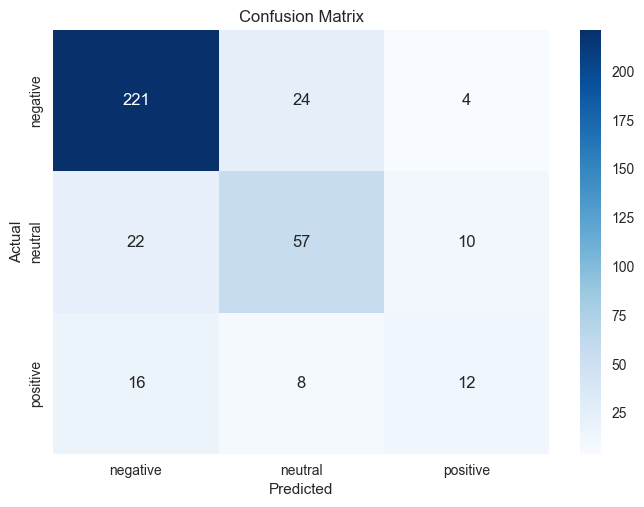

In [32]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred, labels=final_model.classes_)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=final_model.classes_, yticklabels=final_model.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# 10. Save Model and Vectorizer
---

In [33]:
import pickle

# Save model
with open('final_model.pkl', 'wb') as f:
    pickle.dump(final_model, f)

# Save TF-IDF vectorizer
with open('tfidf_vectorizer.pkl', 'wb') as f:
    pickle.dump(vectorizer, f)

# 11. Save Function that used
---

In [34]:
# save stop_words 
import pickle

with open('stopwords_id.pkl', 'wb') as f:
    pickle.dump(stop_words, f)